<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 - Problem 1.3**

CSC 732 Pattern Recognition and Neural Networks

Instructor: Prof. Natacha Gueorguieva

Contributors: Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei

Date: February 26, 2024

Part 1.3 : Use seaborn for plotting, Complete 4 calculations and plottings using seaborn package


Import Libraries

In [11]:
# CSC 732 Hw1 - 1.3
# Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei
# HW1 Part 1.3: Use seaborn for plotting.
# Complete any 4 calculations and plottings using seaborn package

# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt



Import and explorer dataset

read_csv() pandas function

In [12]:
# Import Dataset
filename = '/content/BankNote_Authentication.csv'
# names = ['variance','skewness','curtosis', 'entropy', 'class']
dataset = pd.read_csv(filename, delimiter=',')





Check the Head of dataset

In [13]:
# Check the head of dataset
print("Head of Dataset:")
print(dataset.head(5)) # Display first 5 records
print()



Head of Dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0



Class count of the data

In [14]:
# Count the number of observations of each class
print('Observations per class: \n', dataset['class'].value_counts())
print()



Observations per class: 
 0    762
1    610
Name: class, dtype: int64



**Seaborn Pairplot**

Set hue to class

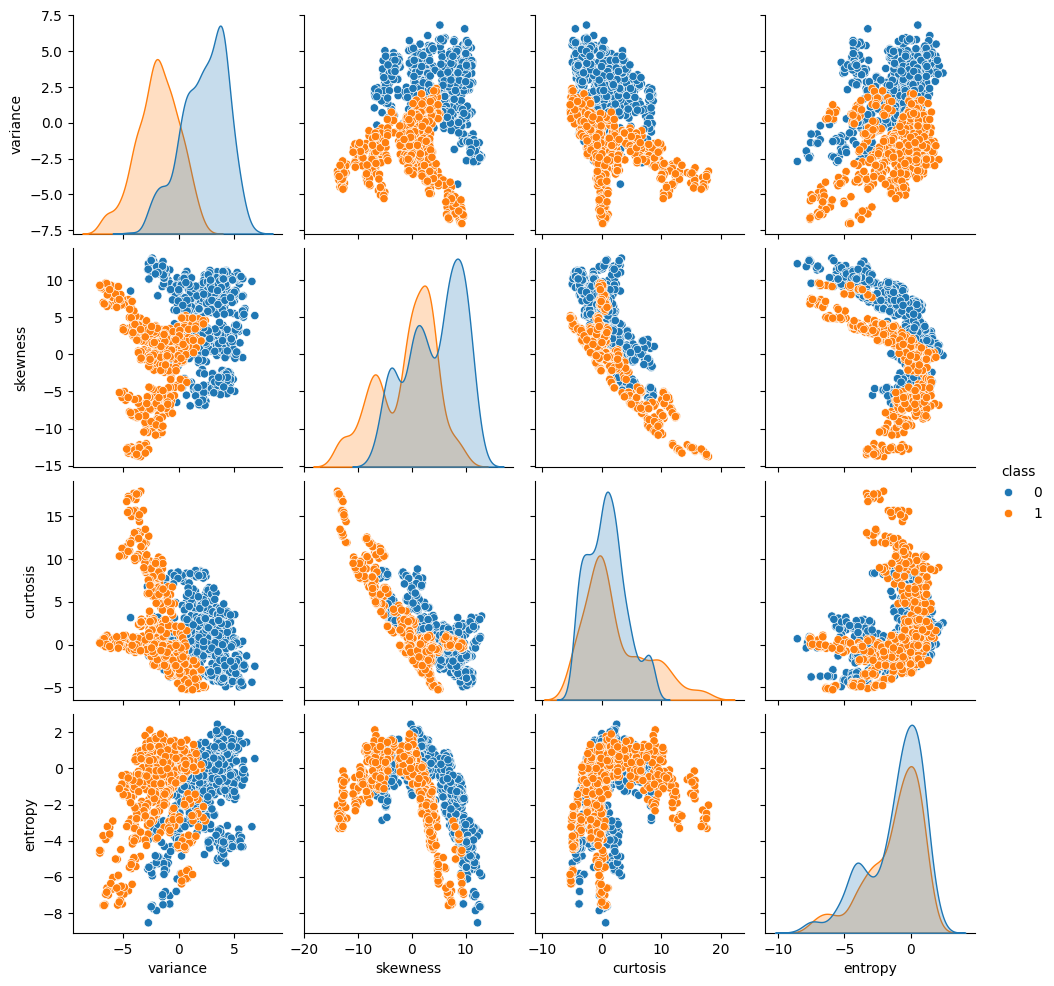

In [15]:
# Use Seaborn Pairplot and set the hue to be our class
sns.pairplot(dataset, hue='class')
print()

**Analysis**
*   The pair plot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the xaxis across a single column.
*   Here we are checking the relation between different parameter and shift in their values according to Class differnece.
*   It helps in getting Standarised Gaussian distribution value for mean and Standard deviation.
*   This is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

**Seaborn Strip Plot**

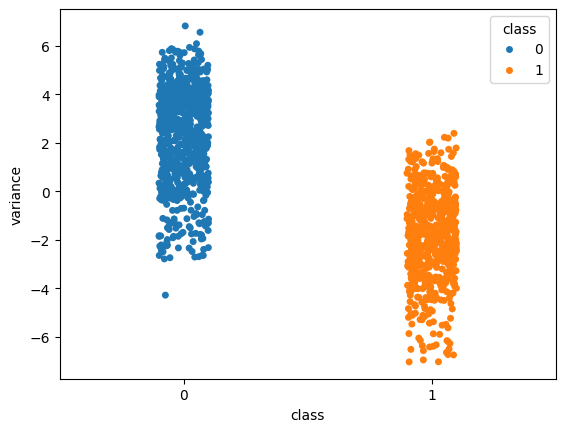

In [16]:
# Seaborn Strip Plot
splot = sns.stripplot(x='class',y='variance',data=dataset,hue='class')
print()

**Analysis**
*   It will show the relation ship between the different varaibles with the class and here we can see how the values of the colums changes when there is a transition from one class to another.
*   Here 2D plotting is performed between Variance and Class column and according value are displayed based on Class.

**Jointplot**

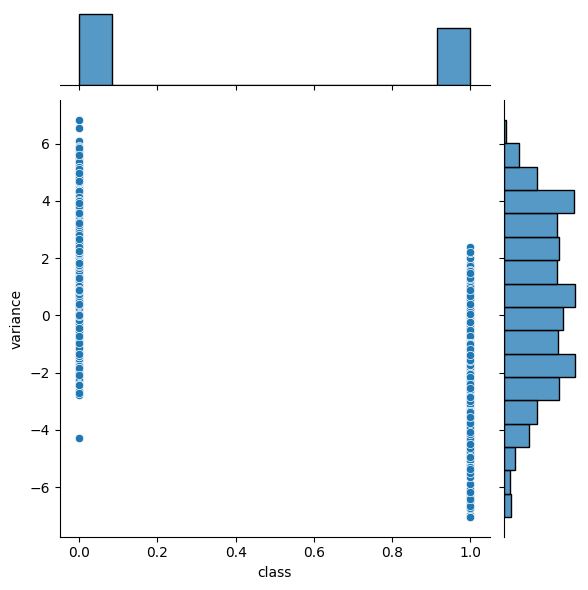

In [17]:
# Seaborn Joint Plot
sns.jointplot(x='class',y='variance',data=dataset)

**Analysis:**
*   Using jointplot we get an figure-level function that help us for visualizations with multiple plots.
*   Here we have focuses on Single Relationship based on Variance and Class column.

X and y paramters for training and testing are seprated, shape of X and y.

In [18]:
X=dataset.drop(labels=['class'],axis=1)
y=dataset['class']
print(X.shape, y.shape)
print()

(1372, 4) (1372,)



**Correlation Heatmap**

<Axes: >

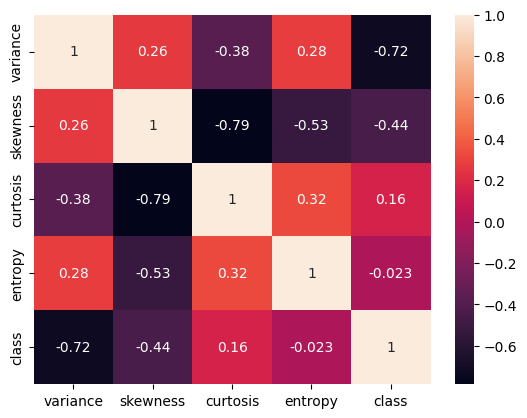

In [19]:
# Correlation Heatmap
heatmp = dataset.corr()
sns.heatmap(heatmp,annot=True)

**Analysis**
*   It shows the correlation between all the columns of the dataset but our concern is the correlation of all other columns based on class columns.
*   While checking the result All Diagonal from top left corner to bottom right corners show perfect Correlation as 1 with Yellow color.
*   Here correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.
*   Here matrix is useful wherein we can see two different views on the same data in one plot and each is perfectly positive correlated.

**Computing the Meanof the Data X and Standarize it for finding PCA**

In [20]:
# Computing the Meanof the Data X and Standarize it for finding PCA
X_standard = X - X.mean()
X_standard

,variance,skewness,curtosis,entropy
0,3.187865,6.743747,-4.204927,0.744667
1,4.112165,6.245047,-3.856227,-0.270443
2,3.432265,-4.560653,0.526573,1.298107
3,3.022865,7.600447,-5.408827,-2.402743
4,-0.104495,-6.377553,3.174173,0.202857
...,...,...,...,...
1367,-0.027595,-0.573153,-2.847727,0.632167
1368,-1.822435,-6.799653,5.079773,1.533447
1369,-4.184035,-15.380953,16.195573,-1.585443
1370,-3.997435,-10.305053,10.995373,-0.090643


**Analysis**
*   Here we are Subtracting each column by its own mean. As a result, the mean of each column becomes zero.
*   Normalization is important in PCA since it is a variance maximizing exercise and it helps in analyzing data onto directions which maximize the variance.
*   Some of variables have a large variance and some small, and we use PCA to load on the large variances.

**Compute the Covariance of the Data for PCA**

In [21]:
# Compute the Covariance of the Data for PCA
dataset_cov = X_standard.cov()
print(dataset.shape)
dataset_cov.head()

(1372, 5)


,variance,skewness,curtosis,entropy
variance,8.081299,4.405083,-4.666323,1.653338
skewness,4.405083,34.445710,-19.905119,-6.490033
curtosis,-4.666323,-19.905119,18.576359,2.887241
entropy,1.653338,-6.490033,2.887241,4.414256


**Analysis**
*   Here covariance measures how two variables in dataset are related to each other, and help us to find whether two variables are moving in the same direction with respect to each other or not.
*   We observe when covariance is positive, then the variable increases, the other increases as well and the opposite true when covariance is negative.
*   The covariance matrix calculates the covariance of all possible combinations of columns in dataset. As a result, it becomes a square matrix with the same number of rows and columns i.e (4*4)

**Compute Eigon Values and Eigon Vectors for PCA**

In [22]:
# Compute Eigon Values and Eigon Vectors for PCA
from numpy.linalg import eig
eigvalues, eigvectors = eig(dataset_cov)
print(eigvalues[:10])
print(eigvectors.shape)

[49.88014585  9.2972722   1.94936791  4.39083842]
(4, 4)


**Analysis**
*   Here we are calculating the Eigen values and Eigen vectors which represent the amount of variance explained and how the columns are related to each other. The length of Eigenvectors is one.
*   Here the eigenvectors represent the directions or components for the reduced subspace of B, whereas the eigenvalues represent the magnitudes for the directions.

**PCA Calculation Using the Dot product of the Eigon vector and standarized columns**

In [23]:
# PCA Calculation Using the Dot product of the Eigon vector and standarized columns
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca)
df_pca_calc.round(2).head()

,0,1,2,3
0,8.12,2.37,-0.96,1.19
1,7.80,2.69,0.41,1.62
2,-3.69,4.37,1.33,-0.17
3,9.91,0.98,1.59,0.52
4,-6.96,0.73,1.27,-0.48


**Analysis**
*   Eigen values and Eigen vectors represent the amount of variance explained and how the columns are related to each other. The length of Eigenvectors is one.
*   The eigenvectors represent the directions or components for the reduced subspace of B, whereas the eigenvalues represent the magnitudes for the directions.

**Distribution Plot**

<ipython-input-24-6afc9f3b2f97>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var)


<Axes: xlabel='variance', ylabel='Density'>

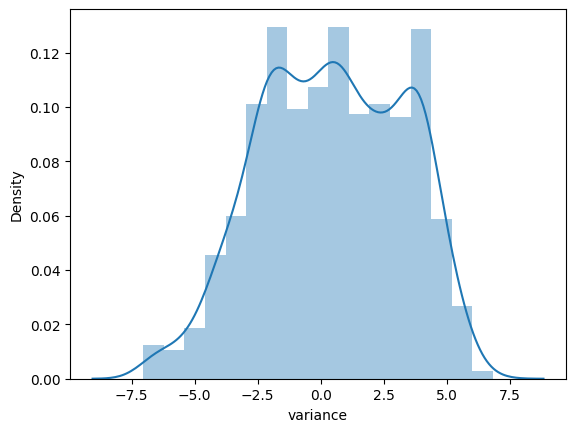

In [24]:
# Distribution Plot
var = dataset.variance
sns.distplot(var)


<ipython-input-25-a211f904ce7e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.curtosis)


<Axes: xlabel='curtosis', ylabel='Density'>

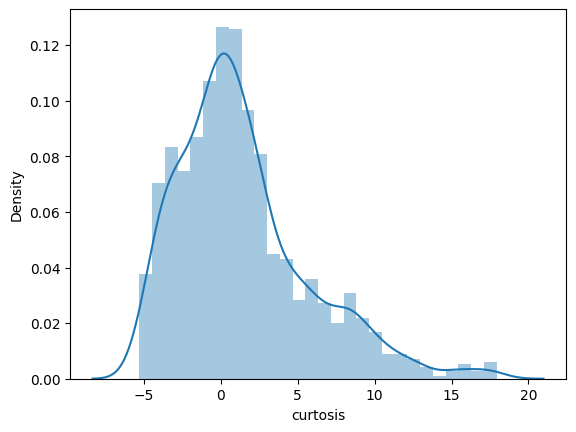

In [25]:
sns.distplot(dataset.curtosis)

<ipython-input-26-6128cf184b42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.entropy)


<Axes: xlabel='entropy', ylabel='Density'>

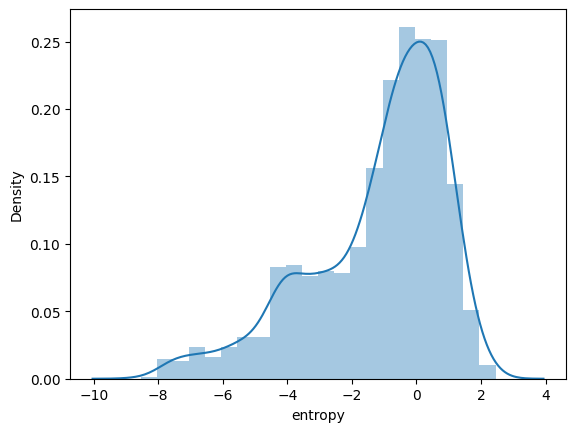

In [26]:
sns.distplot(dataset.entropy)

**Analysis**
*   Here we are using distribution plot for comparing range and distribution for groups of numerical data.
*   Here data is plotted as value points along an axis and it shows the distribution of the "Variance of Image" and the "Curtosis of Image" columns.
*   In the similar way we can plot the distribution of all the columns and determine where it’s skewness lies or where does its major data distribution lies.

In [27]:
feat = pd.DataFrame(X)

Decision Tree Classifer as well as Classfication report of the Analysis

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.30,stratify=y )
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print (confusion_matrix(y_test,prediction))
print('\n')
print (classification_report(y_test,prediction))
print('\n')
print (accuracy_score(y_test,prediction))
print('\n')
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train))) # Training Set
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_test,y_test))) # Testing Set

[[226   3]
 [  7 176]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.98      0.96      0.97       183

    accuracy                           0.98       412
   macro avg       0.98      0.97      0.98       412
weighted avg       0.98      0.98      0.98       412



0.9757281553398058


Accuracy on training set:1.000
Accuracy on training set:0.976


**Analysis**
*   Confusion matrix shown for each Class column value based on actual and prediction. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.
*   True positive is 224, , False Negative is 179 where as False Positive and True Positive are 4 and for model.
*   Overall Accuracy, macro avg, weighted avg based on precision, recall, f1-score are 0.98 which is consider good results.
*   Here Training accuracy is around 1.0 and Testing accuracy is around 0.98

**PCA Implementation**

<Axes: >

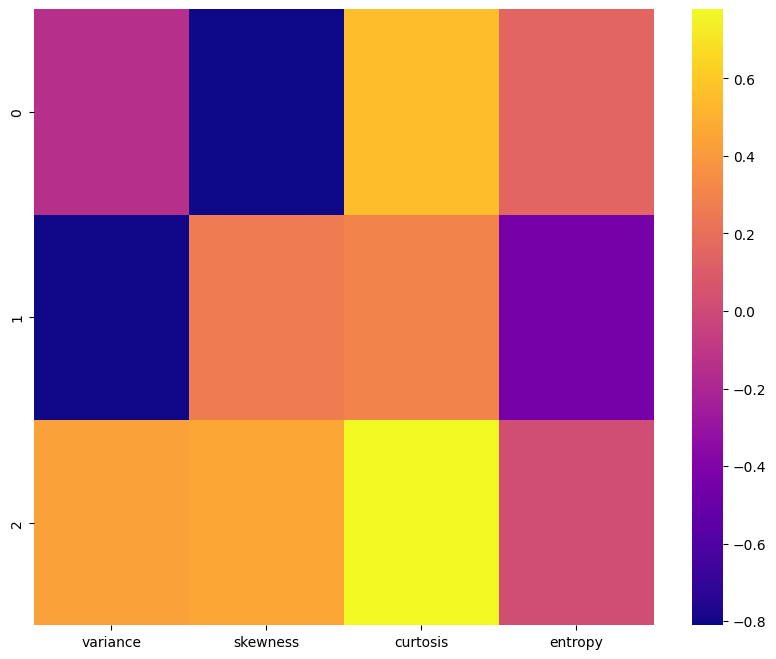

In [29]:
# PCA Implementation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
x_pca= pca.transform(X)
df_comp = pd.DataFrame(pca.components_,columns=list(X))
plt.figure(figsize=(10,8))
sns.heatmap(df_comp,cmap='plasma')


[Text(0.5, 0, 'Number of Components'), Text(0, 0.5, 'Variance (%)')]

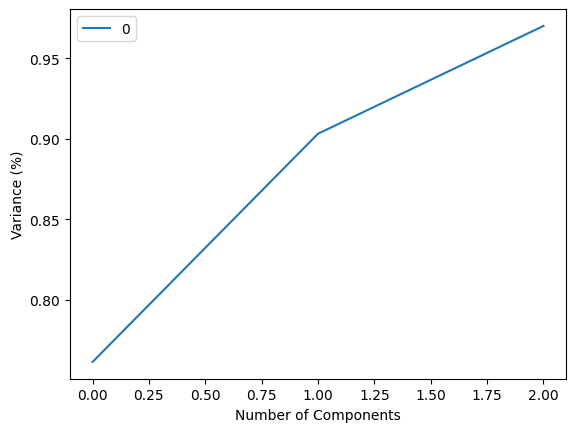

In [30]:
# data_pca = pd.DataFrame(pca.components_, columns=X.columns)
data_pca = pd.DataFrame(data=np.cumsum(pca.explained_variance_ratio_))
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
ax = sns.lineplot(data=data_pca)
ax.set(xlabel="Number of Components", ylabel="Variance (%)")

**Analysis**
*   Here we have fit the data on PCA and ploted it's using seaborn heatmap which shows how and which varaible effect the class and detection of fake currency.
*   We use pca.explained_varianceratio parameter which returns a vector of the variance explained by each dimension. Thus pca.explained_varianceratio[i] gives the variance explained solely by the i+1st dimension.
*   Here we use pca.explained_varianceratio.cumsum() which return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.
*   So here the Line plot is showing is how the varraince of the PCA increase with the increasing of the number of components data_pca = pd.DataFrame(data=np.cumsum(pca.explained_varianceratio))